In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [5]:
#!pip install matplotlib

In [6]:
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
# since TSNE is utterly slow i will only test on a small sample
samplesize = 512
corpus = pd.read_csv('./data/hate_speech.csv', index_col=None).iloc[:512]

In [8]:
corpus.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [9]:
corpus.shape

(512, 7)

In [10]:
cv=CountVectorizer()
word_count_vector=cv.fit_transform(corpus.tweet)

In [11]:
# 24k docs -> 35k words
word_count_vector.shape

(512, 2431)

In [12]:
type(word_count_vector)

scipy.sparse.csr.csr_matrix

In [13]:
# tf-idf scores
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf_vectorizer=TfidfVectorizer()
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(corpus.tweet)
tfidf_vectorizer_vectors.shape

(512, 2431)

In [14]:
print(tfidf_vectorizer.get_feature_names()[:4])

['00sexilexi00', '06e77bgwbx', '10', '11']


In [15]:
len(tfidf_vectorizer.get_feature_names())

2431

In [16]:
type(tfidf_vectorizer_vectors)

scipy.sparse.csr.csr_matrix

In [17]:
tf_idf_embedded  = TSNE(n_components=2).fit_transform(tfidf_vectorizer_vectors.T.toarray())

In [18]:
type(tf_idf_embedded)

numpy.ndarray

In [19]:
df_tf_idf_embedded = pd.DataFrame(tf_idf_embedded, index = tfidf_vectorizer.get_feature_names())
df_tf_idf_embedded.shape

(2431, 2)

In [20]:
df_tf_idf_embedded.head

<bound method NDFrame.head of                        0          1
00sexilexi00   48.410568  14.088880
06e77bgwbx     -2.150741 -63.941952
10             62.839184 -33.813995
11            -13.043794   5.182611
127752        -60.134758   6.216177
...                  ...        ...
zoebarton3     -0.030960  -4.348942
zones         -12.018243  55.092209
zuai7qwbir   -101.585762  12.074128
zvymcxquta    -69.465515 -13.876675
zwnbhpdz8e     25.744997  85.955490

[2431 rows x 2 columns]>

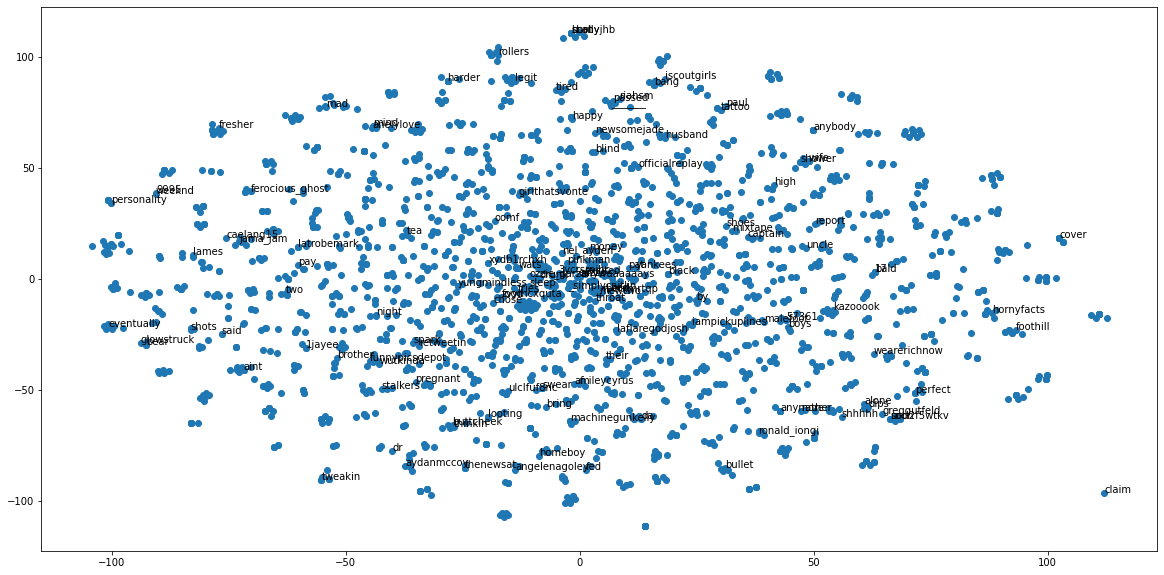

In [21]:
plt.figure(figsize=(20,10))
plt.scatter(tf_idf_embedded[:,0], tf_idf_embedded[:,1])
# only annotate some
samplesize = 128
for i, txt in enumerate(random.sample(list(df_tf_idf_embedded.index),samplesize)):
    plt.annotate(txt, (tf_idf_embedded[:,0][i], tf_idf_embedded[:,1][i]))